## Rotation

In [1]:
#system stuff
import os
import sys
sys.path.append(os.path.join(".."))

# image processing
import cv2
import numpy as np

# display utils
from utils.imutils import jimshow
import matplotlib.pyplot as plt

#from patplotlib import pyplot as plt

__Load image__

In [2]:
image = cv2.imread(os.path.join("..", "data", "img", "trex.png"))

In [3]:
image.shape

(228, 350, 3)

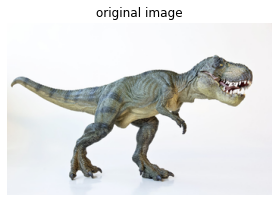

In [4]:
jimshow(image, "original image")

__Challenge 1: Where is the center?__

In [43]:
height, width =image.shape[:2]

In [44]:
height = image.shape[0]
width = image.shape[1]

In [45]:
center = (width//2, height//2)

In [46]:
print(center)

(175, 114)


__Create rotations matrix__

In [47]:
M = cv2.getRotationMatrix2D(center, 45, 1)

In [48]:
rotated =cv2.warpAffine(image, M, (width, height))

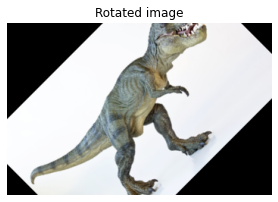

In [49]:
jimshow(rotated, "Rotated image")

In [50]:
print(M)

[[  0.70710678   0.70710678 -29.35385976]
 [ -0.70710678   0.70710678 157.13351365]]


In [54]:
def rotate(image, angle, center = None, scale = 1):
    #grab the dimensions of the image
    (height, width) =image.shape[:2]
    
    #if the center is None, initialize it as the center of 
    # theimage
    if center is None:
        center = (width // 2, height // 2)
    M = cv2.getRotationMatrix2D(center, angle, scale)
    #Rotate image
    rotated =cv2.warpAffine(image, M, (width, height))
    
    #Retur the rotated image
    return rotated

In [55]:
rotated_image = rotate(image, 45)

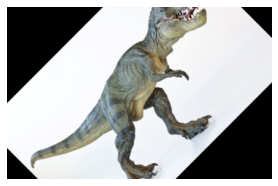

In [56]:
jimshow(rotated_image)

## Splitting channels

I am working with Terasse

In [57]:
image = cv2.imread(os.path.join("..", "data", "img", "terasse.jpeg"))

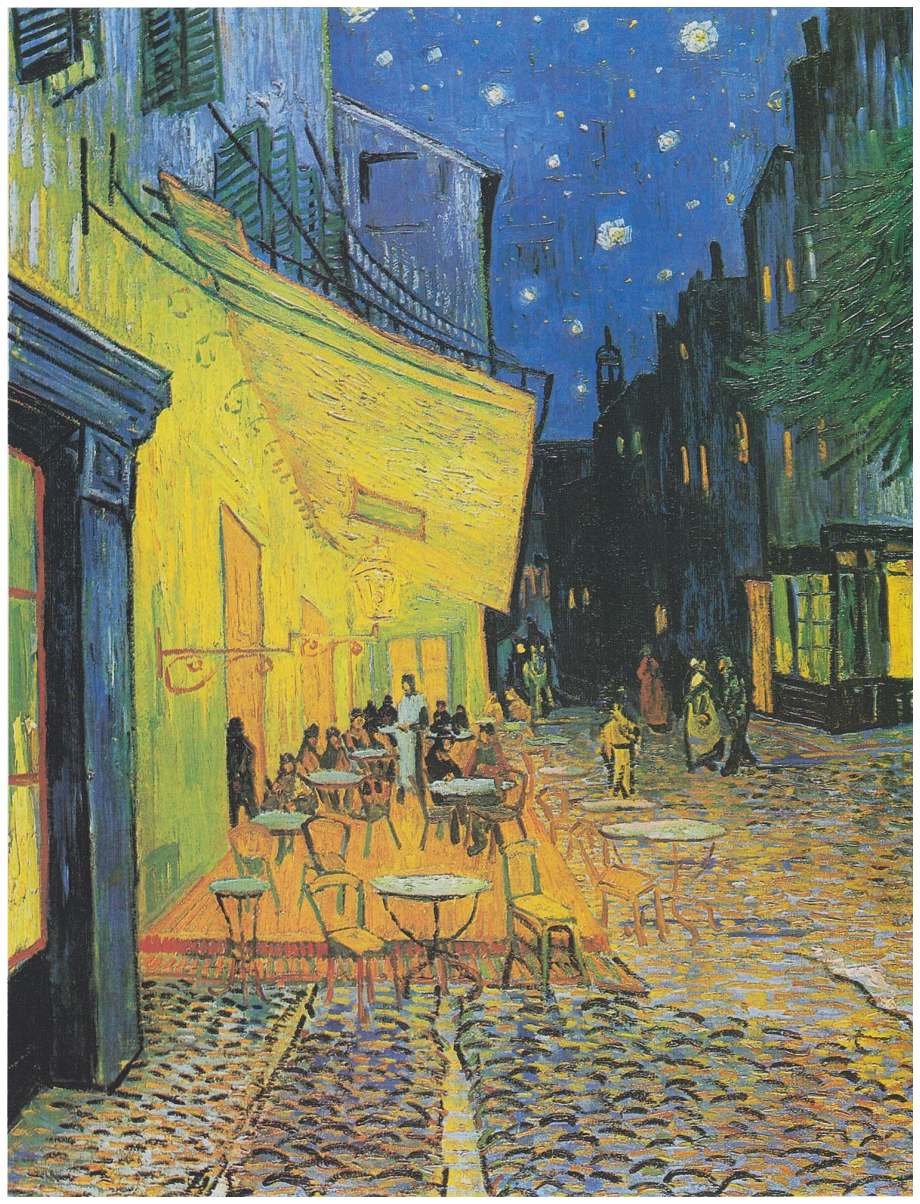

In [59]:
jimshow(image)

 ## Splitting channels

In [66]:
blue =cv2.split(image)[0]
green=cv2.split(image)[1]
red=cv2.split(image)[2]

In [67]:
print(blue)

[[239 238 224 ...  99  95 100]
 [244 240 149 ... 110  96  80]
 [228 237 152 ... 106  98  83]
 ...
 [206 168 173 ... 142 137 147]
 [214 182 178 ... 103 123 144]
 [205 147 168 ... 186 194 186]]


In [68]:
from utils.imutils import jimshow_channel

In [69]:
 def jimshow_channel(image, title=False):
    """
    Modified jimshow() to plot individual channels
    """
    # Acquire default dots per inch value of matplotlib
    dpi = mpl.rcParams['figure.dpi']
    height, width = image.shape
    figsize = width / float(dpi), height / float(dpi)
    plt.figure(figsize=figsize)
    plt.imshow(image, cmap='gray')
    if title:
        plt.title(title)
    plt.axis('off')
    plt.show()

In [70]:
import matplotlib as mpl

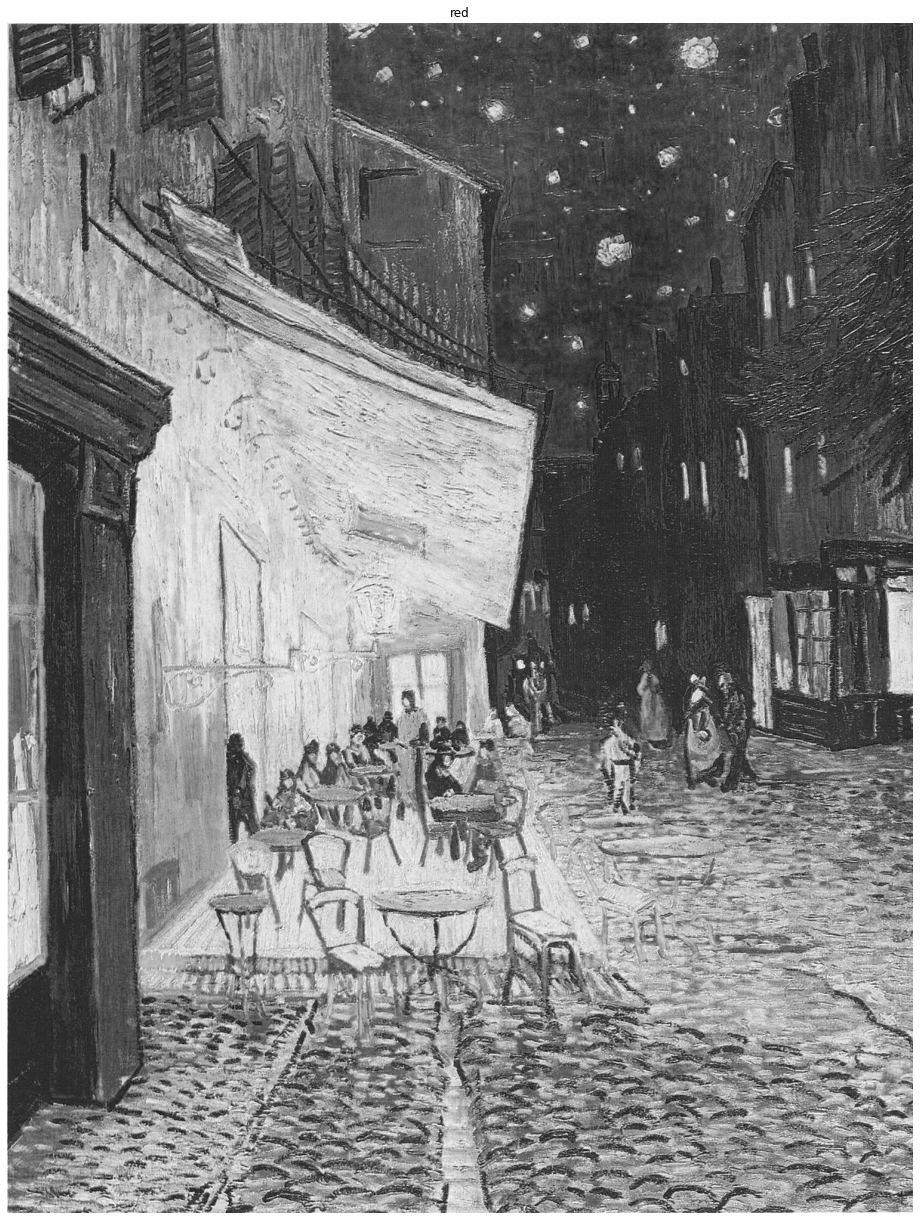

In [74]:
jimshow_channel(red, "red")

__Define empty numpy array__

In [77]:
image.shape[:2]

(1576, 1200)

- uint8 = unsigned

In [78]:
empty_array =np.zeros(image.shape[:2], dtype="uint8")

In [85]:
red_image= cv2.merge([empty_array, empty_array, red])

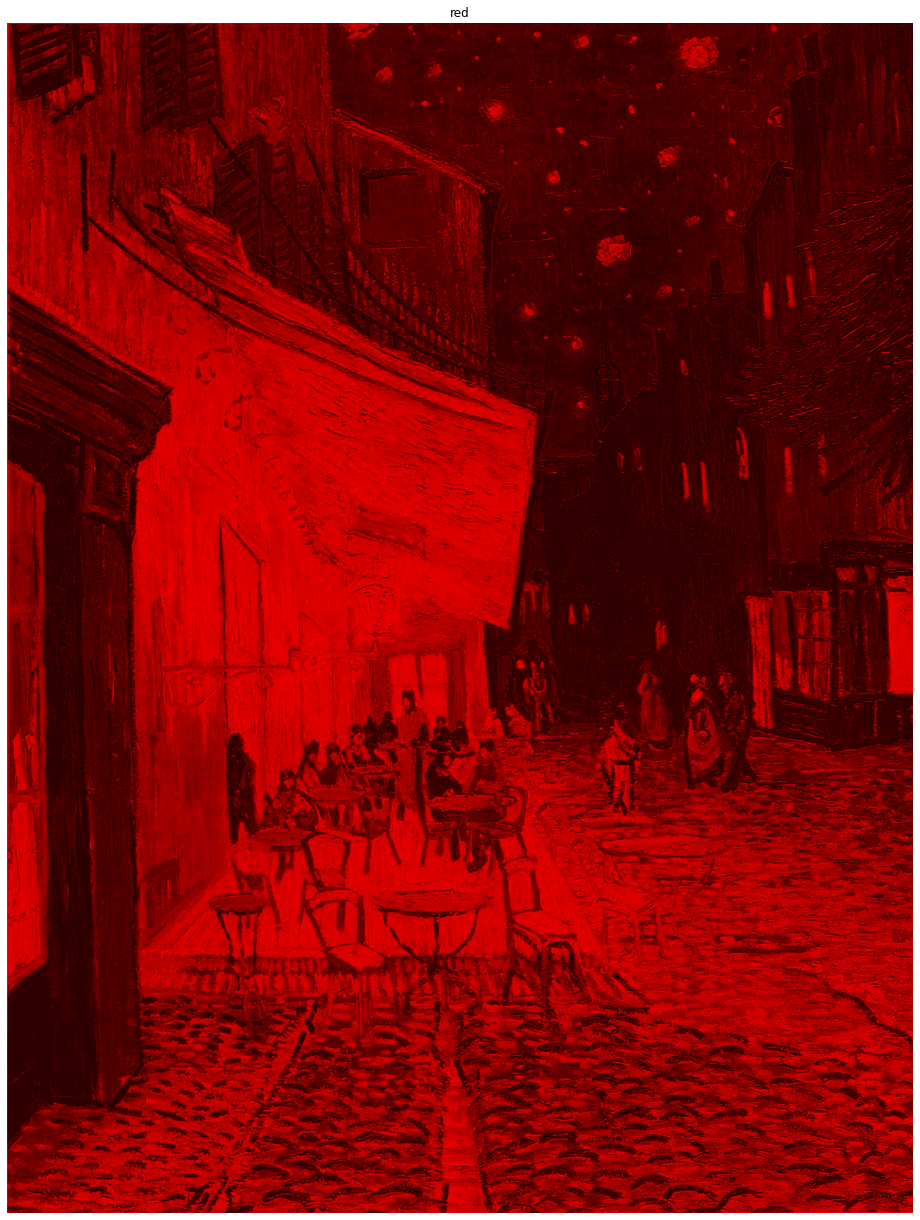

In [86]:
jimshow(red_image, "red")

In [88]:
blue_image= cv2.merge([blue, empty_array, empty_array])

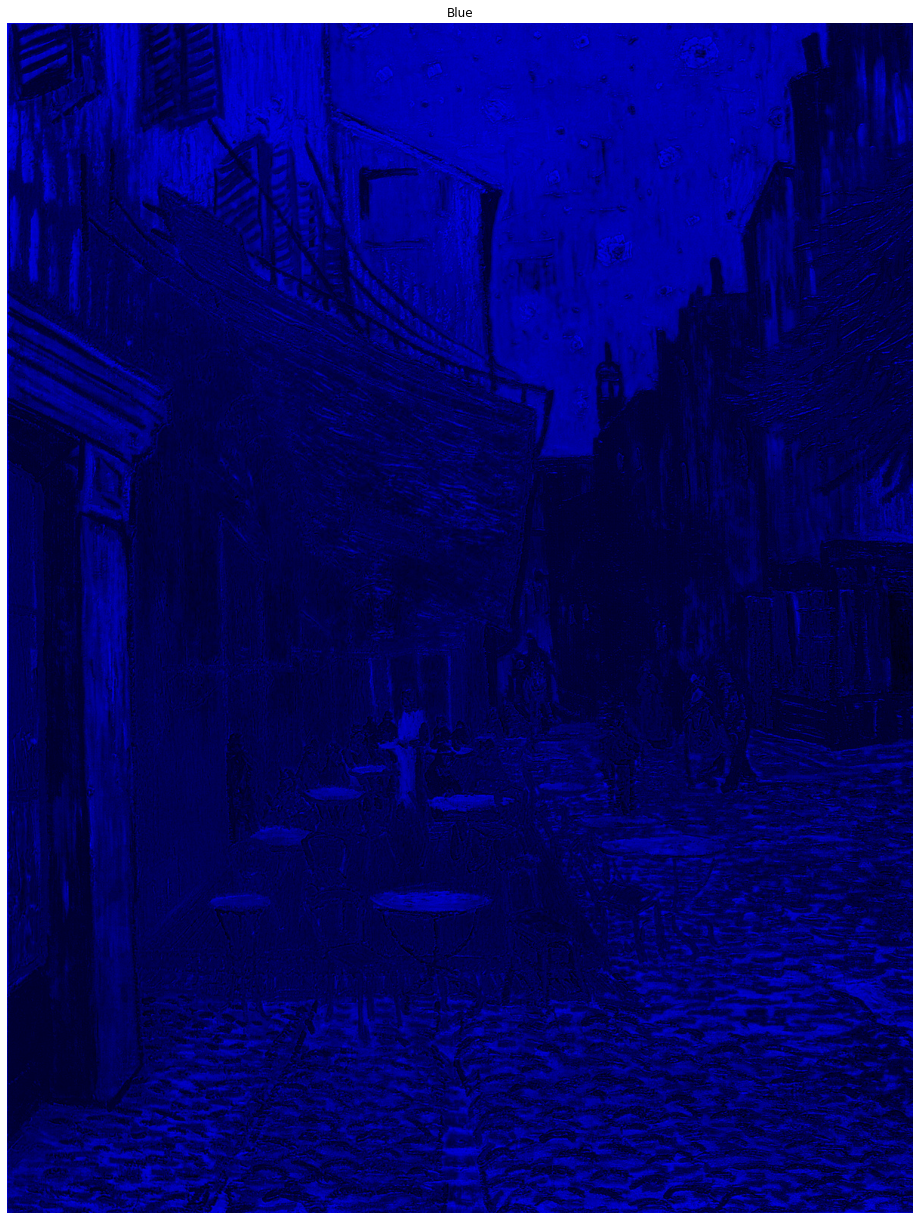

In [89]:
jimshow(blue_image, "Blue")

## Histograms

In [ ]:
grey_image = image.flatten()

<function matplotlib.pyplot.show(close=None, block=None)>

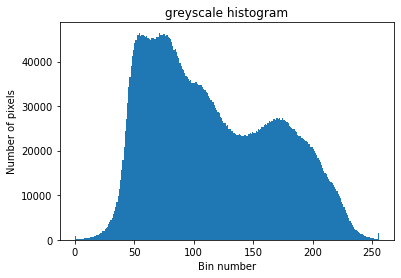

In [98]:
#Create figure
#plt.hist(array, number_of_bins, [range_of_possible_values])
plt.figure()
plt.hist(grey_image, 256, [0,256])
plt.title("greyscale histogram")
plt.xlabel("Bin number")
plt.ylabel("Number of pixels")
plt.show

In [93]:
image.shape[0]*image.shape[1]*3

5673600

In [95]:
grey_image = image.flatten()

## Studying multiple images

In [115]:
def plot_greyscale(input_image, image_name):
    #Initialize figure
    plt.figure()
    # Plot histogram
    plt.hist(input_image.flatten(), 256, [0,256])
    #Give plot title
    plt.title(f"{image_name}")
    #Create xlabel
    plt.xlabel("Bin number")
    #CReate ylabel
    plt.ylabel("Number of pixels")
    #Show plot
    plt.show()

In [116]:
plot_greyscale(image)

TypeError: plot_greyscale() missing 1 required positional argument: 'image_name'

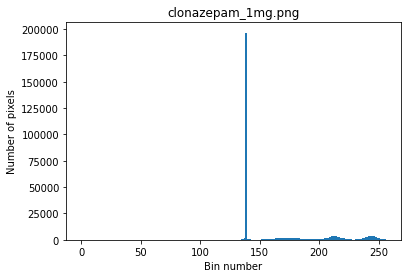

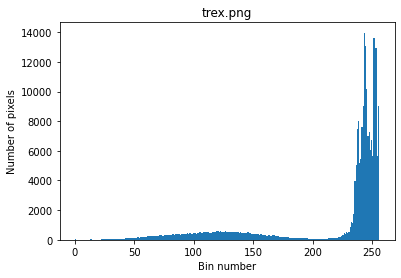

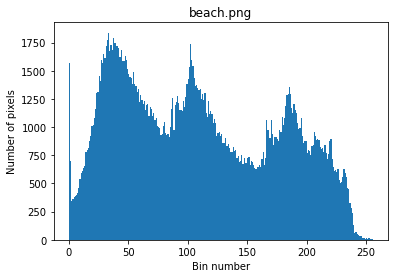

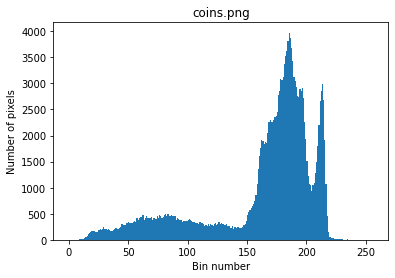

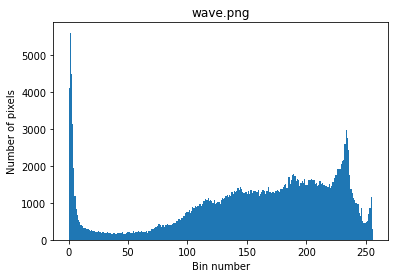

In [119]:
#import pathlib
from pathlib import Path

#Point to an image directory
image_dir = os.path.join("..", "data", "img")

#iterate over files
for image in Path(image_dir).glob("*.png"):
    #cv2 and pathlib dont play nicely
    image_path = str(image)
    #read image
    image = cv2.imread(image_path)
    #Get image name from image path
    _,image_name = os.path.split(image_path)
    #plot greyscale
    plot_greyscale(image, image_name)


In [112]:
os.path.split(image_path)[1]

'clonazepam_1mg.png'

In [113]:
_, image_name = os.path.split(image_path)

In [114]:
print(image_name)

clonazepam_1mg.png


In [124]:
for image in os.listdir(image_dir):
    if image.endswith(".png"):
        print("This is png file")
    elif image.endswith(".jpg"):
        print("This is a jpg file")
    else:
        print("this is neither")
        

This is png file
This is png file
This is png file
This is png file
This is a jpg file
This is png file
this is neither
